
Load model method:patch2pix 
Ckpt:../pretrained/patch2pix_pretrained.pth
Initialize Patch2Pix: backbone=ResNet34 cstride=True upsample=8
Init regressor Namespace(conv_dims=[512, 512], conv_kers=[3, 3], conv_strs=[2, 1], fc_dims=[512, 256], feat_comb='pre', feat_dim=259, panc=1, pshift=8, psize=[16, 16], shared=False)
FeatRegressNet:  feat_comb:pre psize:16 out:5 feat_dim:518 conv_kers:[3, 3] conv_dims:[512, 512] conv_str:[2, 1] 
FeatRegressNet:  feat_comb:pre psize:16 out:5 feat_dim:518 conv_kers:[3, 3] conv_dims:[512, 512] conv_str:[2, 1] 
Xavier initialize all model parameters
Initialize ResNet using pretrained model from https://download.pytorch.org/models/resnet34-333f7ec4.pth
Reload all model parameters from weights dict
matches=90, inliers=27
Plotting inliers:  27


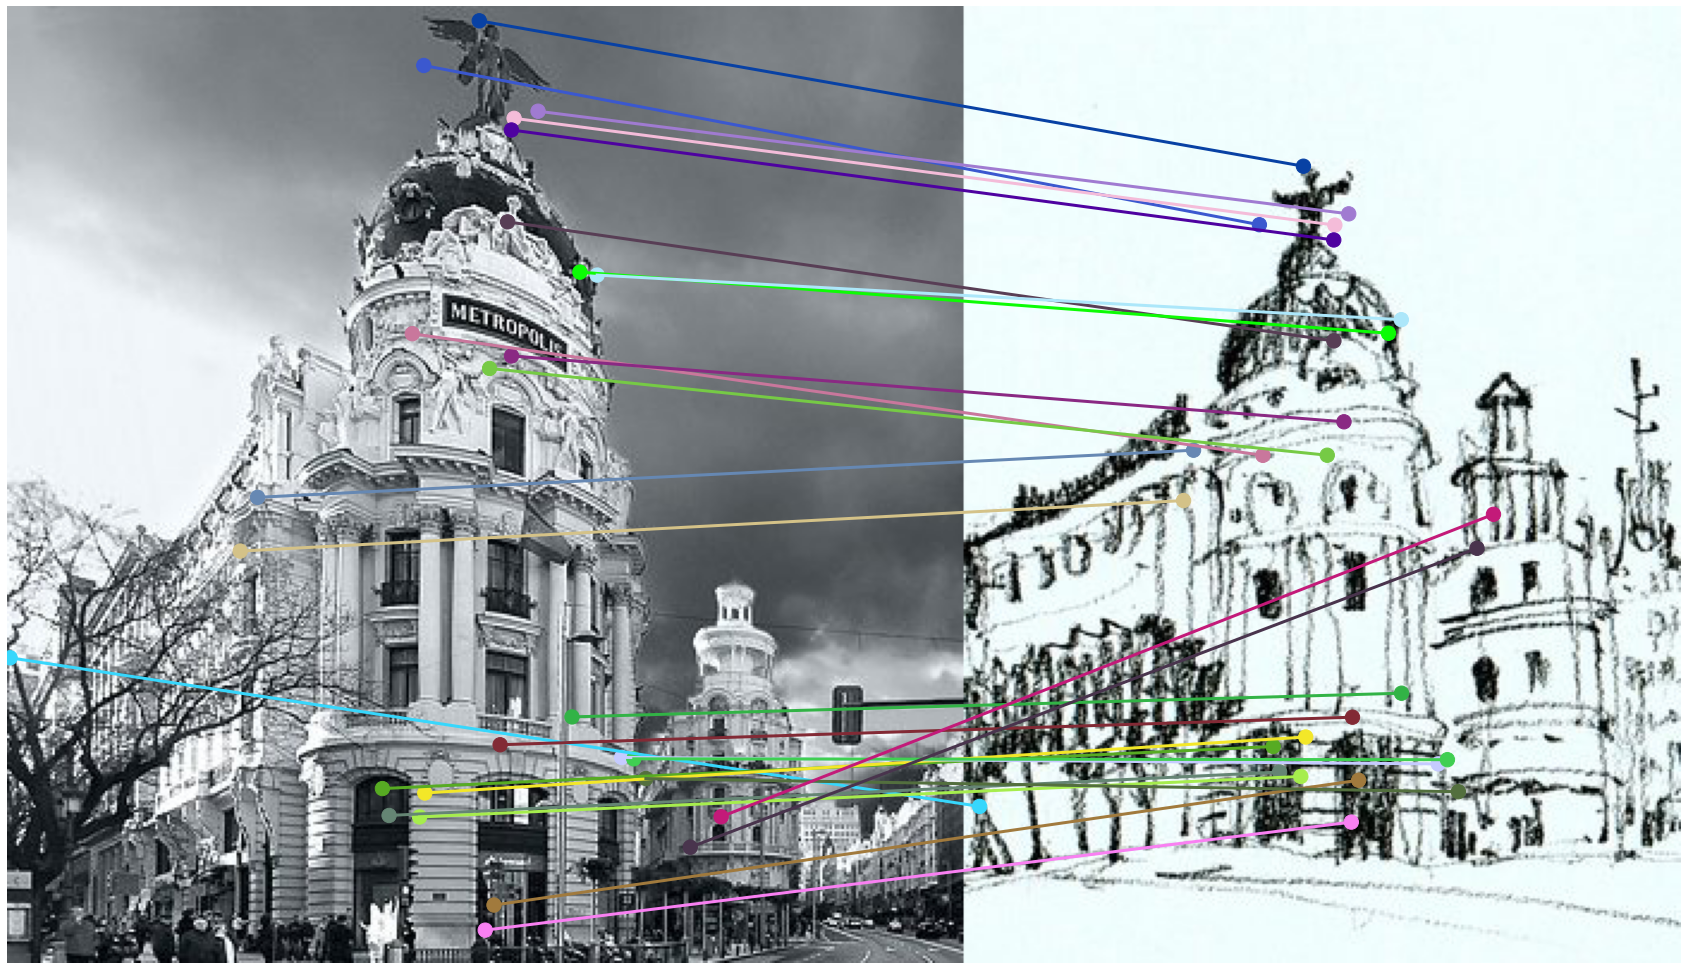

matches=210, inliers=115
Plotting inliers:  115


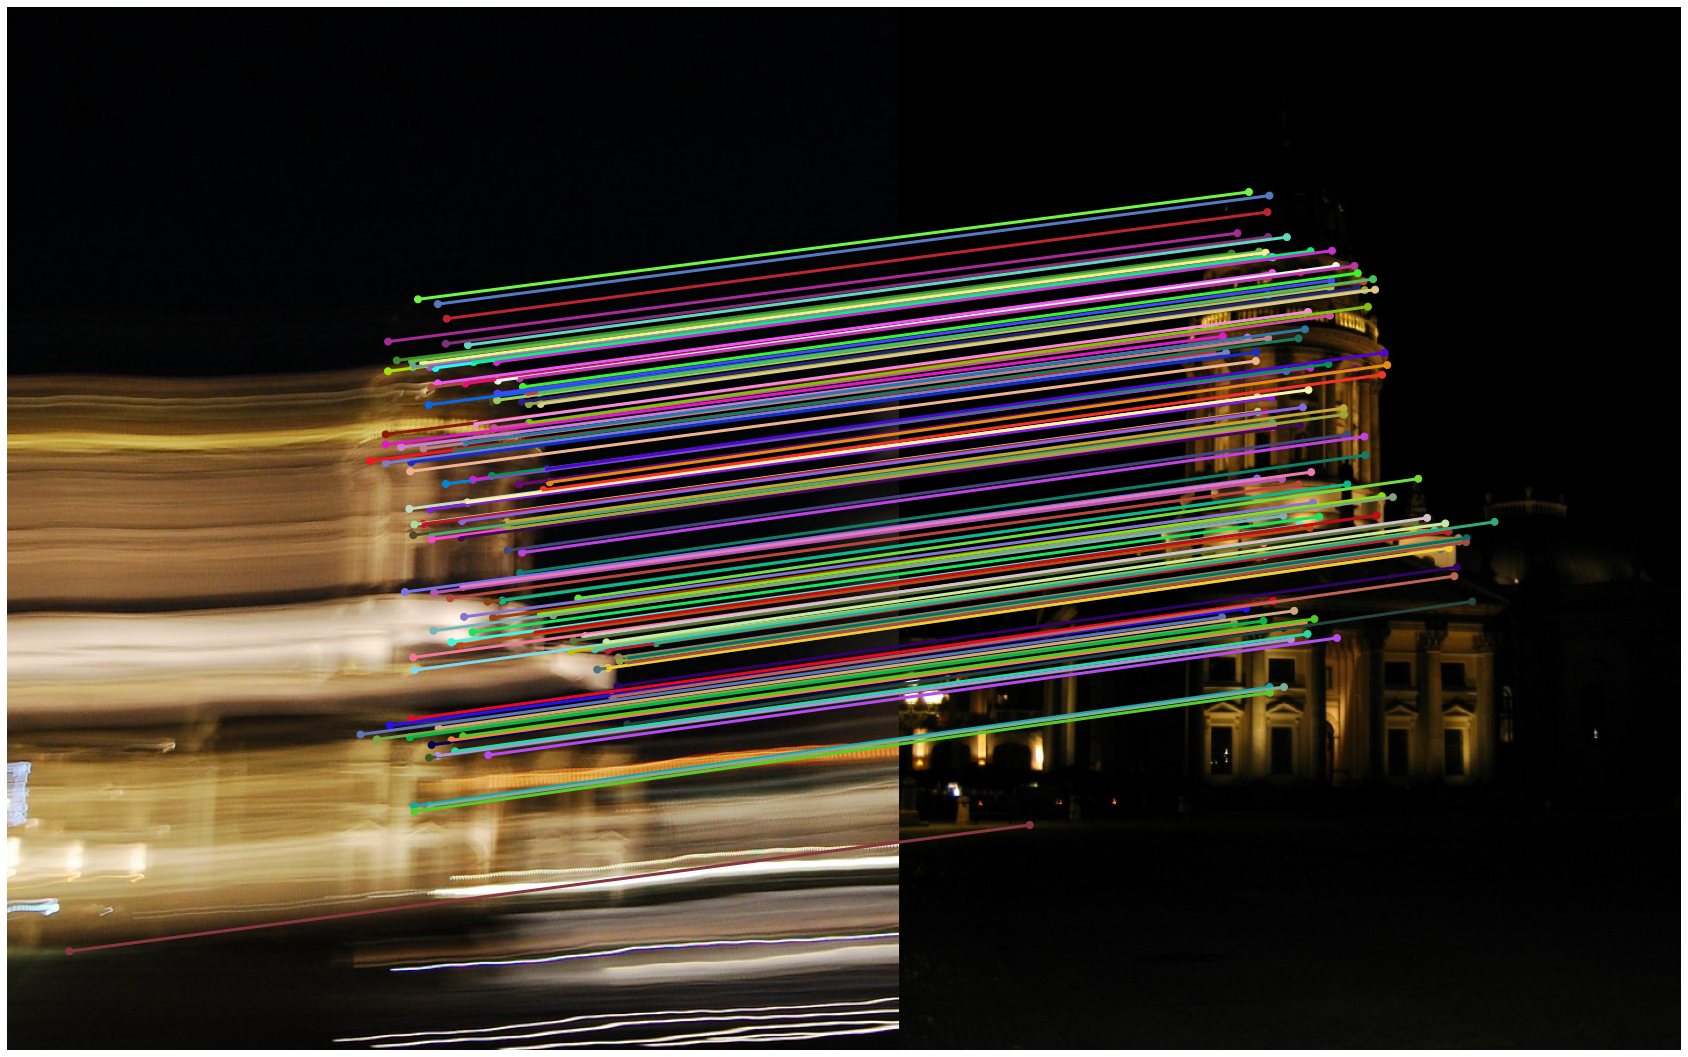

matches=164, inliers=50
Plotting inliers:  50


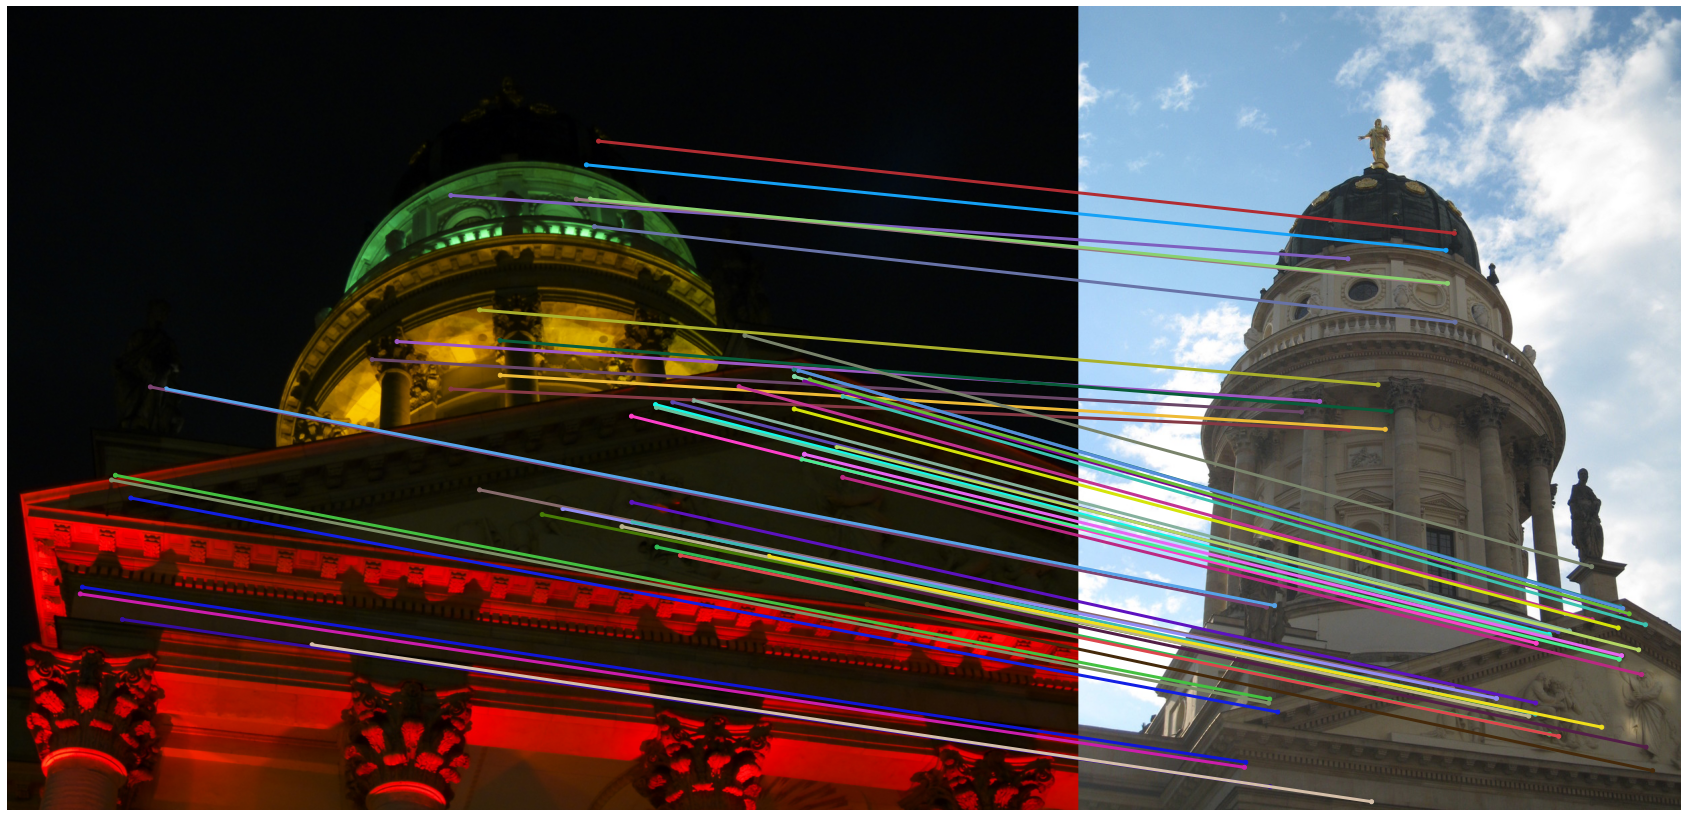

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('..')

from argparse import Namespace
import os
import numpy as np
import pydegensac
from utils.common.plotting import plot_matches
from utils.eval.model_helper import *
np.set_printoptions(precision=2)

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

METHOD = 'patch2pix'

if METHOD == 'nc':
    # Initialize ncnet matcher
    args = Namespace(ncn_thres=0.9, imsize=1024, ksize=2,
                     ckpt='../pretrained/ncn_ivd_5ep.pth')
    matcher = init_ncn_matcher(args)
else:
    # Initialize patch2pix matcher
    args = Namespace(io_thres=0.25, imsize=1024, ksize=2,
                     ckpt='../pretrained/patch2pix_pretrained.pth')
    matcher = init_patch2pix_matcher(args)


    
# Visualize matches on D2Net example pairs
for i in range(1, 4):
    im1_path = f'./images/pair_{i}/1.jpg'
    im2_path = f'./images/pair_{i}/2.jpg'

    # Predict matches (with ransac geometric verification)
    matches, _, _ = matcher(im1_path, im2_path)
    _, inls = pydegensac.findFundamentalMatrix(matches[:, 0:2], matches[:, 2:4], 1.0)
    # _, inls = pydegensac.findHomography(matches[:, 0:2], matches[:, 2:4], 2.0)

    inls = np.where(inls > 0)[0] 
    print(f'matches={len(matches)}, inliers={len(inls)}')

    # For clean visualization
    n = len(inls) // 150
    if n  > 1:
        print(f'Print every {n} match')
        inls = inls[::n]   
    plot_matches(im1_path, im2_path, matches, inliers=inls, lines=True, radius=3)
